<a href="https://colab.research.google.com/github/ankush-kp/ankush-k-p/blob/master/Irisclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
 import pandas as pd
 import numpy as np
 import os
 import matplotlib.pyplot as plt
 import plotly.express as px
 import seaborn as sns
 import warnings
 warnings.filterwarnings('ignore')

In [4]:
 df = pd.read_csv('Iris.csv')
 df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(53, 6)

In [7]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,53.000000,53.000000,53.000000,53.000000
mean,5.105660,3.403774,1.647170,0.313208
std,0.538308,0.374660,0.774498,0.303846
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.300000,3.600000,1.600000,0.300000
max,7.000000,4.400000,4.900000,1.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  53 non-null     float64
 1   SepalWidthCm   53 non-null     float64
 2   PetalLengthCm  53 non-null     float64
 3   PetalWidthCm   53 non-null     float64
 4   Species        53 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


In [10]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,3


In [11]:
df.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


<Axes: >

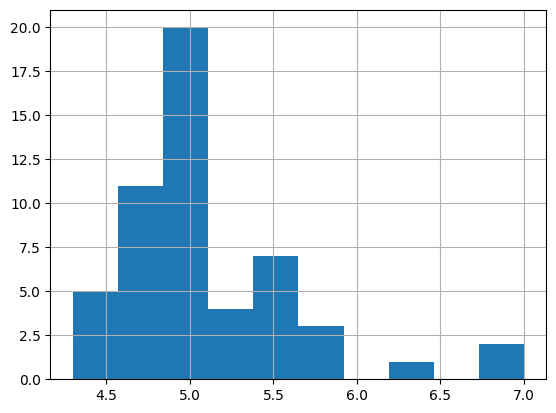

In [12]:
df['SepalLengthCm'].hist()

<Axes: >

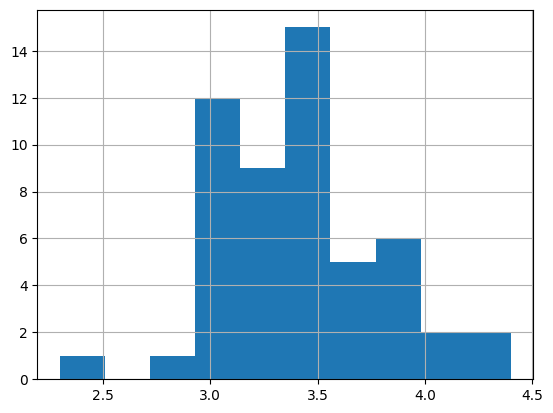

In [13]:
df['SepalWidthCm'].hist()


<Axes: >

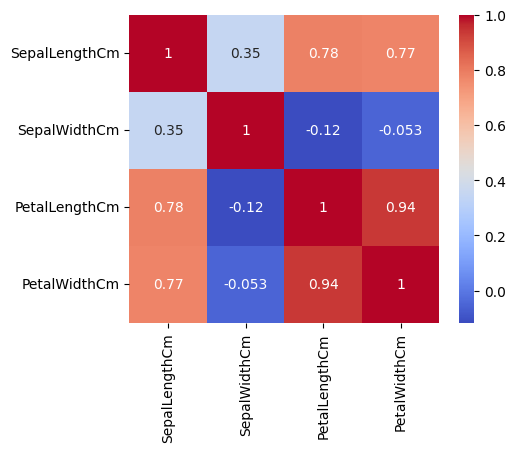

In [16]:
corr = df.select_dtypes(include=np.number).corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [17]:
 px.scatter(df, x='Species', y='PetalWidthCm')


In [18]:
 px.line(df, x='Species', y='PetalWidthCm')


In [19]:
 px.scatter(df, x='Species', y='PetalLengthCm')


In [20]:
 px.scatter(df, x='Species', y='SepalLengthCm')


In [21]:
 px.scatter(df, x='Species', y='SepalWidthCm')


In [27]:
px.scatter_matrix(df, color='Species', title='Iris', dimensions=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [30]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

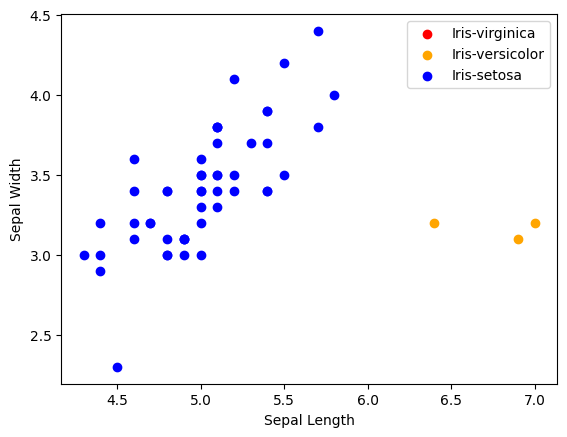

In [31]:
for i in range(3):
 x = df[df['Species'] == species[i]]
 plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
 plt.xlabel("Sepal Length")
 plt.ylabel("Sepal Width")
 plt.legend()

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
 from sklearn.model_selection import train_test_split
 X = df.drop(columns=['Species'])
 Y = df['Species']
 x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
model.fit(x_train, y_train)


LogisticRegression()

In [40]:
print("Accuracy: ",model.score(x_test, y_test) * 100)


Accuracy:  100.0


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
model = DecisionTreeClassifier()

In [43]:
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [45]:
print("Accuracy: ",model.score(x_test, y_test) * 100)


Accuracy:  100.0


In [47]:
data = 8,3.755,7,2.1


In [48]:
data_array = np.array([data])
data_array

array([[8.   , 3.755, 7.   , 2.1  ]])

In [49]:
predic = model.predict(data_array)


In [50]:
predic

array([1])

In [52]:
catagory = ['Iris-Satosa','Iris-Versicolor','Iris-Virginica']


In [53]:
print(catagory[int(predic[0])])


Iris-Versicolor


In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         1

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

1.0
